In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures

<h1> Reguralization for Linear Regression </h1> 

<h3> Polynomial Regression, Bias and Variance</h3>

<h2> Polynomial Regression <h3>

Polynomial Regression is a type of regression supervised algorithm in which the relationship between feature vector $X$ and target one $Y$ is an $n^{th}$ degree polynomial function. <br> We gonna use the data set which is prepared in advance using 3^{th} degree polynomial <br> <br> $$y_i = f(x_i) =  \theta_3x_{i}^3 + \theta_2x_i^2 +\theta_1x_i +  \theta_0 + \varepsilon_i $$
let weights  be assigned  $theta_0=$  ... and the $\varepsilon$ is Gaussian distributed with mean zero and some  variance $\sigma$   <br> <br>
$$𝜀 \sim N(0,\sigma^2) $$ 

In [387]:
x = 2 - np.linspace(-5,5,num=60) *4 #generate the X data  
y = x - 0.2 * (x ** 2) + 0.05 * (x ** 3)  + np.random.normal(-40, 40, size=x.size) +2 #generate target points y

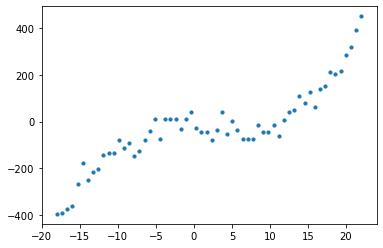

In [388]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

Now we should find some Regression model wich will fit the data well.Let's try with simple linear regression.

In [129]:
def regression(model, x_train, y_train, x_test, y_test) :
    std = StandardScaler().fit(x_train)
    regr_type = model.fit(std.transform(x_train),y_train)
    y_predicited = regr_type.predict(std.transform(x_test))
    return y_predicited, regr_type.score(std.transform(x_test),y_test), regr_type.coef_   

In [130]:
y_pred, score, coef = regression(LinearRegression(), x, y, x, y)

0.7891223492133288

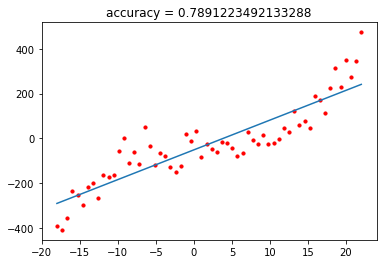

In [374]:
y_pred, score, coef = regression(LinearRegression(), x, y, x, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))
score

As we can see above using a straight line we've achieved 69% accuracy which is too low, therefore we say that the model is too simple to describe the data, in this case, we say the model is an underfitting. The model is not able to capture the points well, there high bias.We can boost the model by increasing the degree of the polynomial. We can add new features that are powers of the original one. 

$$X = \begin{bmatrix} 
 x_1 \\
\vdots   \\
 x_n \\
\end{bmatrix} 	\rightarrow 
X_{polyData} = T(X) = \begin{bmatrix} 
1 &x_1 & x_1^2 & \dots & x_1^p \\
\vdots & \ddots &  \ddots & \vdots & \vdots \\
1& x_n & x_n^2  & \dots & x_n^p \\
\end{bmatrix} $$

Thus we can improve the model from $Y = \omega_0  + \omega_1x$ to $Y = \omega_0  + \omega_1 x^1 + ... + \omega_p x^p$
but the problem still remains linear because $Y$ is multi linear dependented to $x_i^j$.That means we can use again the LinearRegression()just before that we will convert the original features  into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn.
example of tranformation of dataset to higher order degree :

In [365]:
def polynomial_convert(X,degree):
    '''
    X : like array 
       dataset
    degree : int 
       number of powers
    '''
    return PolynomialFeatures(degree=degree).fit_transform(X)   
   

Text(0.5, 1.0, 'accuracy = 0.9634125414086822')

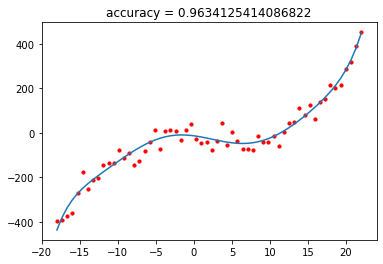

In [401]:
x_poly = polynomial_convert(x, 7)
y_pred, score, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

We can see that the acuracy of $10^{th}$ polynomial is 100%.This result means that the errors are also captured the that is called overffiting.The model has too high variance.That is bad result because on new unseen data the model will perform bad result.Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.<br> <br>
Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.


There are quite a number of techniques that help to prevent overfitting.Regularization is one such technique.Regularization basically aims at proper feature selection to avoid over-fitting. Lasso regression achieves regularization by completely diminishing the importance given to some features (making the weight zero).

<h2 id='lasso'> Lasso Regression (L1 Regularization) </h2>

This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.


The lost function of the Lasso is the ordinary least square with constraint.<br> <br>
    $$J(\varTheta) = \frac{1}{2m}\sum_{i}^n(  y_i - \sum_j^mx_{ij}\theta_j)^2 $$
    $$subject \; to \hspace{1cm} \sum_j^m|\theta_j| < \lambda $$
Using langrange multiplyer the solutions of above equtions is :

$$LassoLost = J(\varTheta) = \frac{1}{2m}\sum_{i}^n(  y_i - \sum_j^m x_{ij}\theta_j )^2 + \lambda \sum_j^m|\theta_j|$$

$\lambda \sum_j^m|\theta_j|$ represens the penalty <br>
A tuning parameter, $λ$ controls the strength of the L1 penalty. $λ$ is basically the amount of shrinkage:
<ul>
  <li>When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.</li>
<li> As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when $λ = ∞$, all coefficients are eliminated). </li>
    <li> As λ increases, bias increases. </li>
    <li> As λ decreases, variance increases. </li>
</ul>    

Lets investigate what the lasso will perform,we gonna use </mark> Lasso </mark> from <mark>sklearn</mark>

<ipython-input-129-45b93e132574>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_type = model.fit(std.transform(x_train),y_train)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33904.9704249291, tolerance: 173.36402686106769
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'accuracy = 0.9608858065438219')

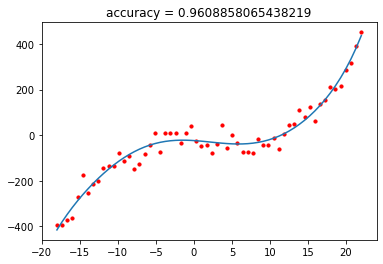

In [402]:
y_pred, score, coef = regression( Lasso(alpha=0), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

In [357]:
y_pred, score, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
weights = coef
alphas = [0.001, 0.010, 0.1, 0.6 , 1 , 1.5,10,15]
for alpha in alphas:
    y_pred, score, coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    weights = np.vstack([weights,coef])
    

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92154.0529614094, tolerance: 102.63994033084316
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18287.52388121406, tolerance: 102.63994033084316
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602.6939059981087, tolerance: 102.63994033084316
  model = cd_fast.enet_coordinate_descent(


In [404]:
y_pred, score, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
weights = np.array([])
alphas = [10e-4,10e-3,10e-2,10e-1,10]
print(weights.shape)
for alpha in alphas:
    y_pred, score, coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   


(0,)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33172.201319224565, tolerance: 173.36402686106769
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26516.117227609342, tolerance: 173.36402686106769
  model = cd_fast.enet_coordinate_descent(


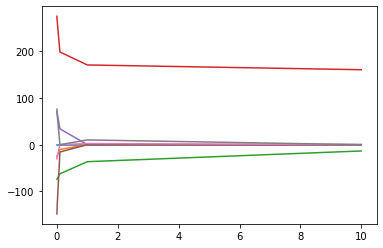

In [405]:

for i in range(weights.shape[0]):
    plt.plot(np.array(alphas),(weights[i,:]))

<h2> References </h2>
[1] <a href='https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression'>Lasso and Ridge Regression Tutorial</a> <br>
https://www.datacamp.com/tutorial/tutorial-ridge-lasso-elastic-net